# Validation

In [1]:
%matplotlib inline

In [2]:
import psst

In [3]:
from psst.case import read_matpower
from psst.network import create_network

### Validation of case 1

In [4]:
case = read_matpower('./cases/case1.m')

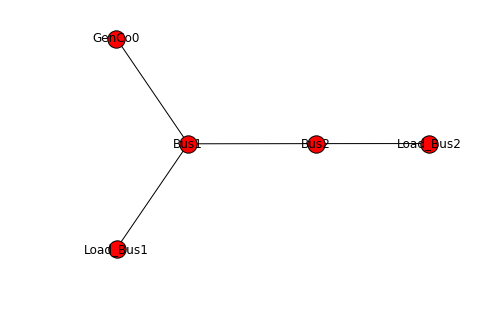

In [5]:
create_network(case).draw()

In [6]:
case

<psst.case.PSSTCase(name=case5, Generators=1, Buses=2, Branches=1)>

In [22]:
case.bus

,TYPE,PD,QD,GS,BS,AREA,VM,VA,BASEKV,ZONE,VMAX,VMIN
Bus1,3,400,131.47,0,0,1,1,0,230,1,1.1,0.9
Bus2,2,0,0.00,0,0,1,1,0,230,1,1.1,0.9


In [21]:
case.branch

,F_BUS,T_BUS,BR_R,BR_X,BR_B,RATE_A,RATE_B,RATE_C,TAP,SHIFT,BR_STATUS,ANGMIN,ANGMAX
0,Bus1,Bus2,0.00281,0.0281,0.00712,400,400,400,0,0,1,-360,360


In [7]:
case.gen

,GEN_BUS,PG,QG,QMAX,QMIN,VG,MBASE,GEN_STATUS,PMAX,PMIN,PC1,PC2,QC1MIN,QC1MAX,QC2MIN,QC2MAX,RAMP_AGC,RAMP_10,RAMP_30,RAMP_Q,APF
GenCo0,Bus1,500,0,30,-30,1,100,1,500,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
case.gencost

,MODEL,STARTUP,SHUTDOWN,NCOST,COST_1,COST_0
GenCo0,1,0,0,2,14,0


In [9]:
case.load

,Bus1,Bus2
0,400.0,0.0


In [10]:
from psst.model import build_model

In [11]:
model = build_model(case)

In [12]:
model

<psst.model.PSSTModel(status=None)>

In [13]:
model.solve(solver='cbc', verbose=True)

Welcome to the CBC MILP Solver 
Version: 2.9.6 
Build Date: May 27 2016 

command line - /usr/local/bin/cbc -mipgap 0.01 -printingOptions all -import /var/folders/wk/lcf0vgd90bx0vq1873tn04knk_djr3/T/tmpABI6sG.pyomo.lp -import -stat=1 -solve -solu /var/folders/wk/lcf0vgd90bx0vq1873tn04knk_djr3/T/tmpABI6sG.pyomo.soln (default strategy 1)
No match for mipgap - ? for list of commands
No match for 0.01 - ? for list of commands
Option for printingOptions changed from normal to all
Current default (if $ as parameter) for import is /var/folders/wk/lcf0vgd90bx0vq1873tn04knk_djr3/T/tmpABI6sG.pyomo.lp
Presolve 5 (-31) rows, 10 (-21) columns and 15 (-59) elements
Statistics for presolved model
Original problem has 1 integers (1 of which binary)


Problem has 5 rows, 10 columns (7 with objective) and 15 elements
There are 7 singletons with objective 
Column breakdown:
8 of type 0.0->inf, 1 of type 0.0->up, 0 of type lo->inf, 
1 of type lo->up, 0 of type free, 0 of type fixed, 
0 of type -inf->0.0, 

### Input data

In [14]:
import pandas as pd

In [15]:
pd.DataFrame(case.gen['PMAX'])

,PMAX
GenCo0,500


In [16]:
case.load

,Bus1,Bus2
0,400.0,0.0


### Model Results

In [17]:
model.results.unit_commitment

,GenCo0
0,1


In [18]:
model.results.power_generated

,GenCo0
0,400


In [19]:
model.results.production_cost

5600

In [20]:
model.results.lmp

,Bus1,Bus2
0,14,14
